## School Shooting Data

In [402]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster
sns.set()


In [403]:
df=pd.read_csv(r'dataset.csv')
df.head(5)

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,-75.584900,39.668100,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,0,1,1,8-Jan-09,High School,1.000230e+11,8:30PM
1,-87.617500,41.839900,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,0,5,5,9-Jan-09,High School,1.709930e+11,8:00PM
2,-90.165100,38.565700,1712.0,2009,Cahokia High School,Cahokia,Illinois,800 Range Ln,suburbtown,BLACK,1,0,1,23-Jan-09,High School,1.708040e+11,7:20PM
3,-78.311800,35.831500,3713.0,2009,Zebulon Middle School,Zebulon,North Carolina,Halifax Road and New Oak Street,suburbtown,BLACK,0,1,1,11-Feb-09,Middle School,3.704720e+11,6:00AM
4,-83.113977,42.383593,NaN,2009,Central High School,Detroit,Michigan,2425 Tuxedo St,urban,NaN,0,1,1,17-Feb-09,High School,2.601103e+11,2:20PM


Check Nulls

In [404]:
df.isnull().sum().sort_values(ascending=False)

CDCODE        11
race           7
time           6
NCESSCH        5
LATCOD         3
LONCOD         3
urbanrural     3
state          0
address        0
city           0
school         0
killed         0
injured        0
victims        0
date           0
type           0
year           0
dtype: int64

#### Replace null values in the coordinate columns

In [405]:
#Author: HIMALAY PARMAR 

def geocode_city(city):
    location = geolocator.geocode(city,timeout=100)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

for index, row in df.iterrows():
    if pd.isnull(row['LATCOD']) or pd.isnull(row['LONCOD']):
        latitude, longitude = geocode_city(row['city'])
        df.at[index, 'LATCOD'] = latitude
        df.at[index, 'LONCOD'] = longitude

#### Check null values again

In [406]:
df.isnull().sum().sort_values(ascending=False)

CDCODE        11
race           7
time           6
NCESSCH        5
urbanrural     3
city           0
state          0
address        0
LATCOD         0
school         0
killed         0
injured        0
victims        0
date           0
type           0
year           0
LONCOD         0
dtype: int64

#### Convert to time format 

In [407]:
df['time'] = df['date'] + ' ' + df['time']
pd.to_datetime(df['time'],  format='%d-%b-%y %I:%M%p')
df['Year'] = pd.DatetimeIndex(df['time']).year
df['Month'] = pd.DatetimeIndex(df['time']).month
df['week'] = pd.DatetimeIndex(df['time']).week
df['hour'] = pd.DatetimeIndex(df['time']).hour
df['weekday'] = pd.DatetimeIndex(df['time']).weekday
df.head(2)


c:\Users\dario\anaconda3\envs\downgrade\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,...,victims,date,type,NCESSCH,time,Year,Month,week,hour,weekday
0,-75.5849,39.6681,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,...,1,8-Jan-09,High School,1.000230e+11,8-Jan-09 8:30PM,2009.0,1.0,2.0,20.0,3.0
1,-87.6175,41.8399,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,...,5,9-Jan-09,High School,1.709930e+11,9-Jan-09 8:00PM,2009.0,1.0,2.0,20.0,4.0


In [408]:
df.columns

Index(['LONCOD', 'LATCOD', 'CDCODE', 'year', 'school', 'city', 'state',
       'address', 'urbanrural', 'race', 'killed', 'injured', 'victims', 'date',
       'type', 'NCESSCH', 'time', 'Year', 'Month', 'week', 'hour', 'weekday'],
      dtype='object')

### Map Visualization

#### Shooting clusters

In [409]:
usacoordinate= 37.09024,-95.712891
usa_map=folium.Map(location=usacoordinate, zoom_start=4)
marker = MarkerCluster()
for lat,long,desc in zip(df.LATCOD,df.LONCOD,df.school):
        folium.Marker(
        location=[lat,long]
    ).add_child(folium.Popup(desc)).add_to(marker)


usa_map.add_child(marker) 

### EDA

### What has been the shooting behavior over the years?

Text(0, 0.5, 'Number of incidents')

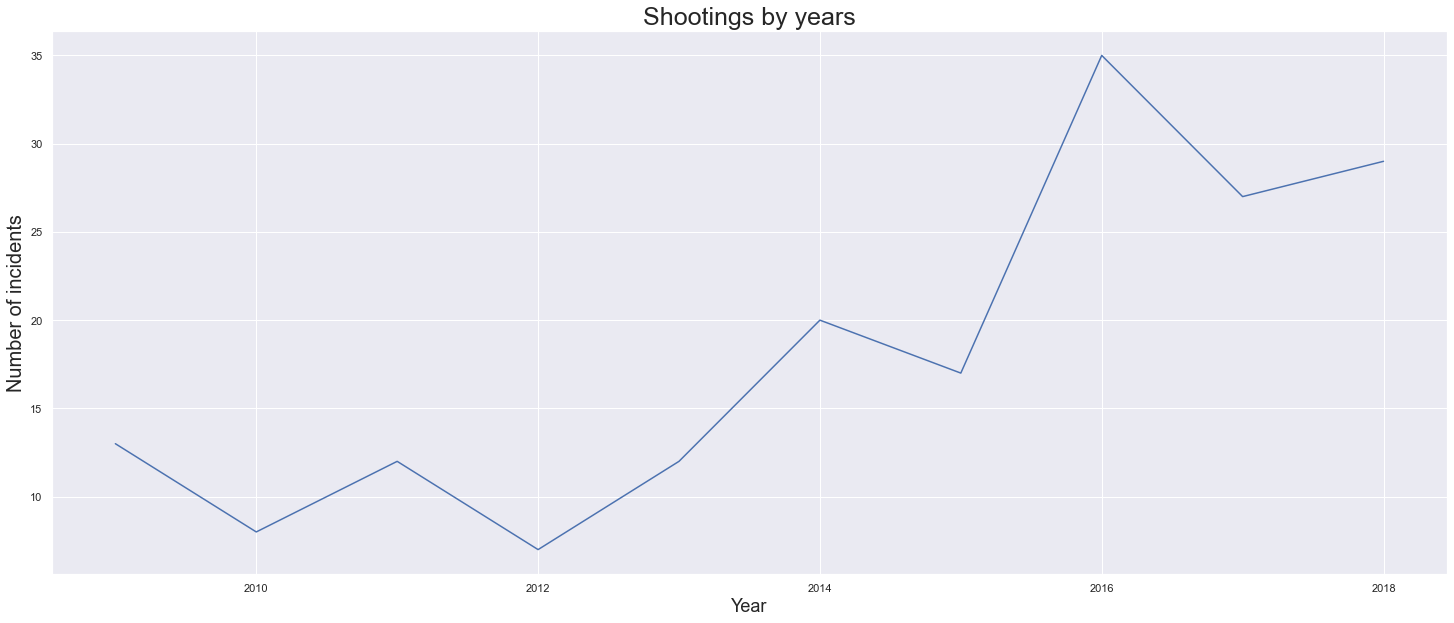

In [484]:
county=df['year'].value_counts().reset_index()
plt.figure(figsize=(25,10))
county.columns = ['year','count']
plt.title("Shootings by years", size=25)
sns.lineplot(data=county,x=county['year'],y=county['count'])
plt.xlabel("Year",size=18)
plt.ylabel("Number of incidents",size=20)

#### What day of the week do the most shootings occur?

Text(0, 0.5, 'Number of incidents')

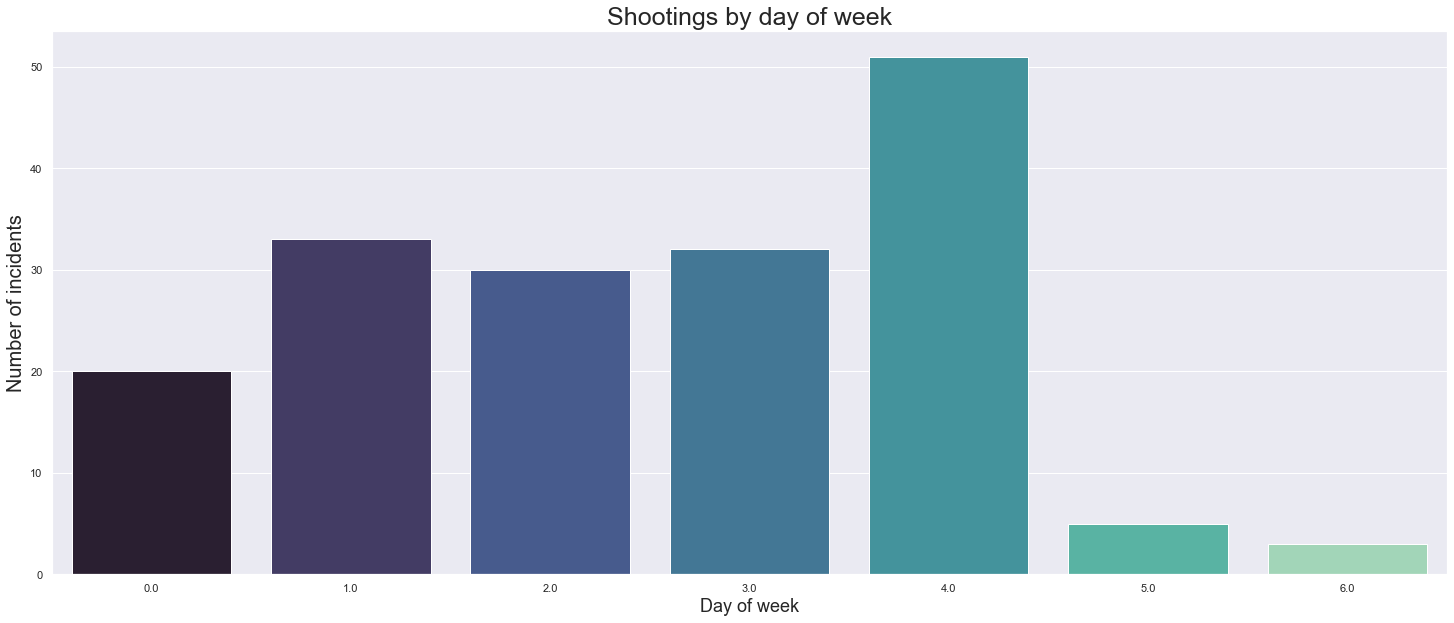

In [483]:
plt.figure(figsize=(25,10))
plt.title("Shootings by day of week", size=25,)
sns.countplot(data=df,x=df['weekday'],palette="mako")
plt.xlabel("Day of week",size=18)
plt.ylabel("Number of incidents",size=20)

#### What times do the most shootings occur ?

<AxesSubplot:title={'center':'Shootings by hours'}, xlabel='hour', ylabel='count'>

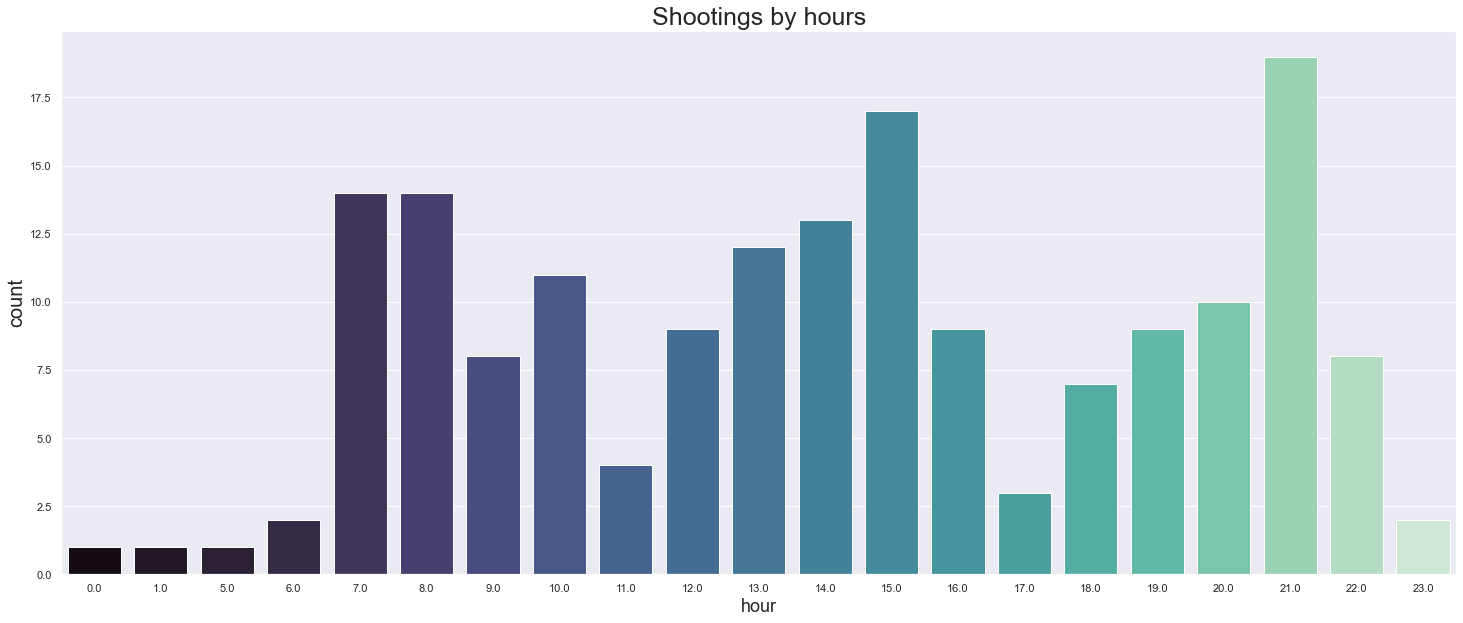

In [482]:
plt.figure(figsize=(25,10))
plt.title("Shootings by hours", size=25)
plt.xlabel("Hours",size=18)
plt.ylabel("Number of incidents",size=20)
sns.countplot(data=df,x=df['hour'],palette="mako")

#### Which month do most shootings occur?


<AxesSubplot:title={'center':'Shootings by Month'}, xlabel='Month', ylabel='count'>

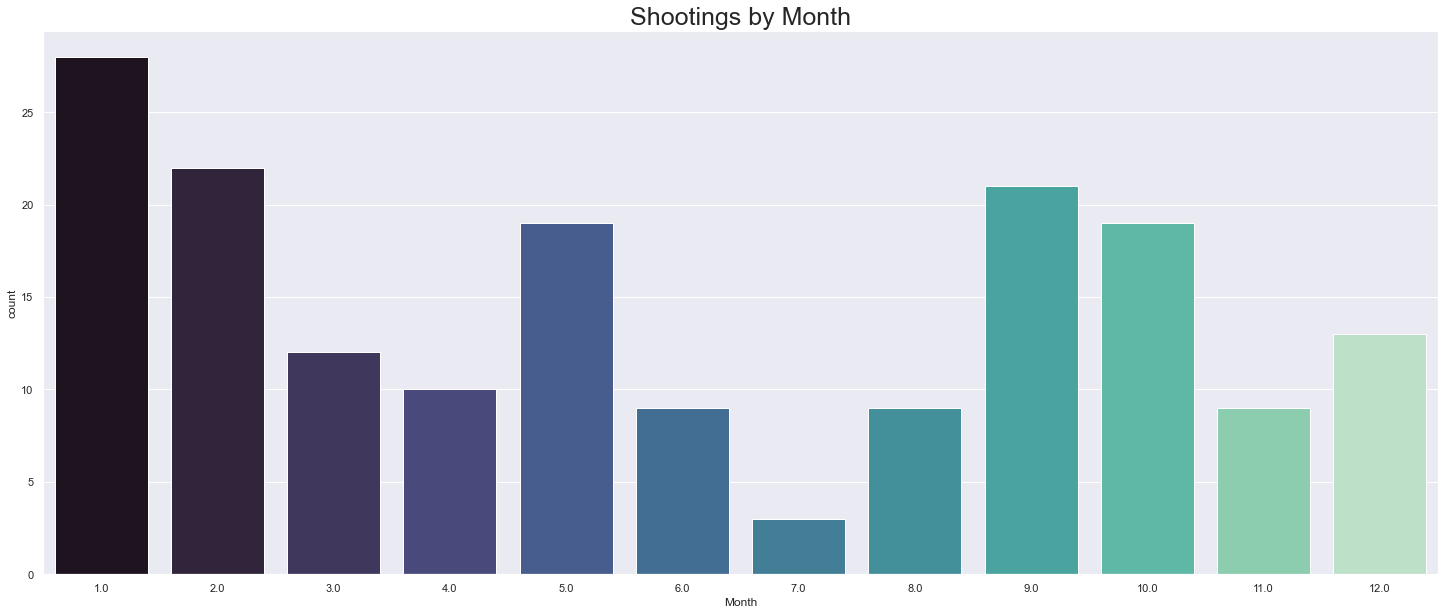

In [443]:
plt.figure(figsize=(25,10))
plt.title("Shootings by Month", size=25)
sns.countplot(data=df,x=df['Month'],palette="mako")

#### Which state do most shootings occur?

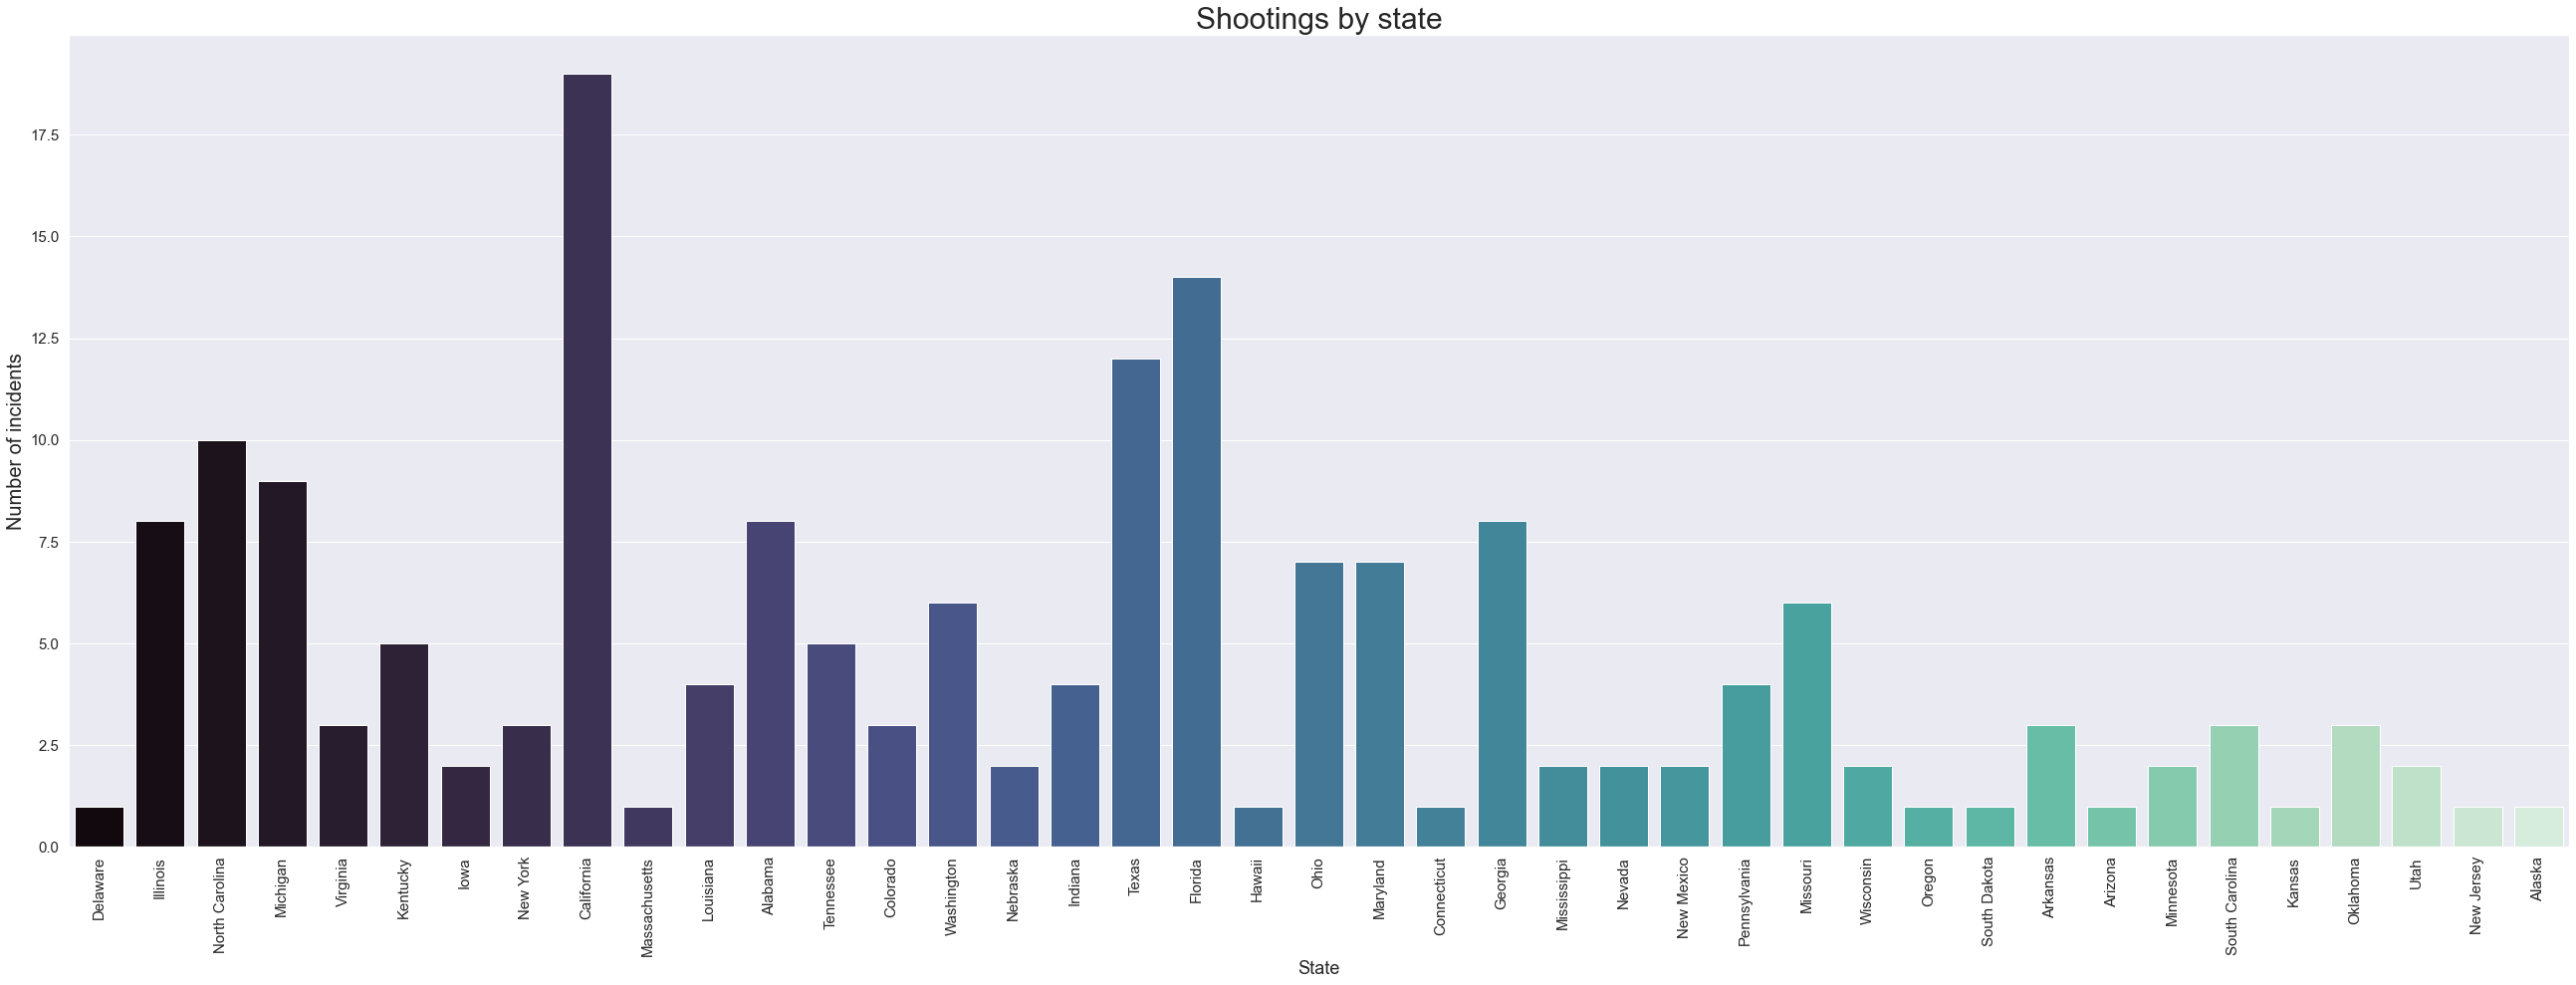

In [469]:
plt.figure(figsize=(45,15))
ax=sns.countplot(data=df,x=df['state'],palette="mako")
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Shootings by state", size=30)
plt.xlabel("State",size=18)
plt.ylabel("Number of incidents",size=20)
plt.show()

#### Which type of population do most shootings occur?

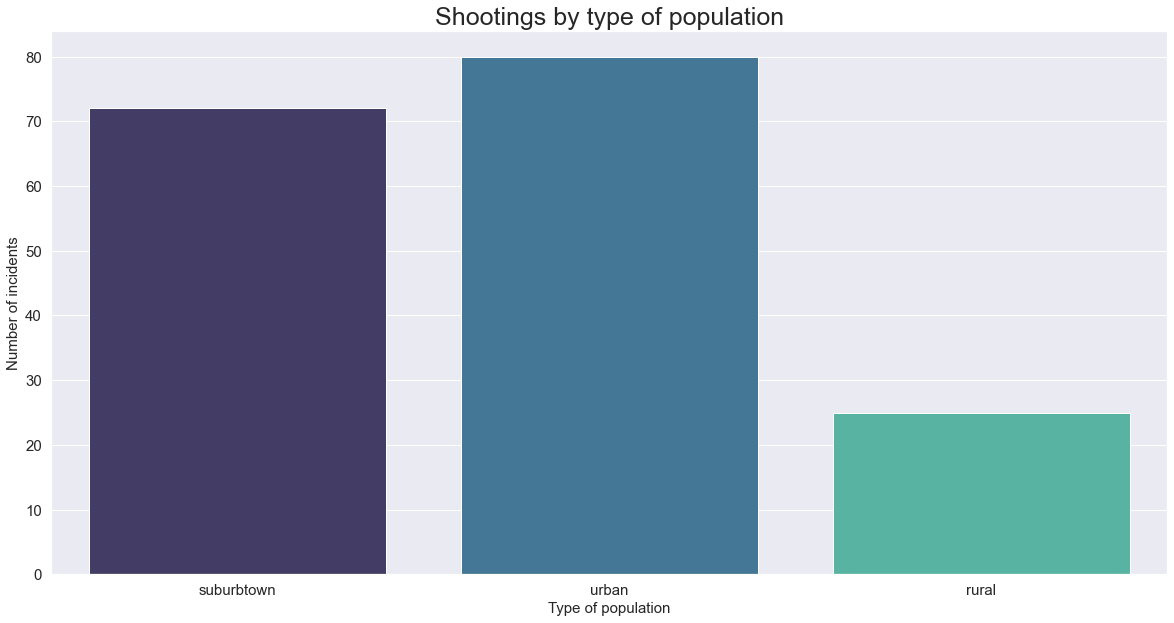

In [481]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x=df['urbanrural'],palette="mako")
plt.title("Shootings by type of population", size=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Type of population",size=15)
plt.ylabel("Number of incidents",size=15)
plt.show()

#### How many shootings occur per school stage?

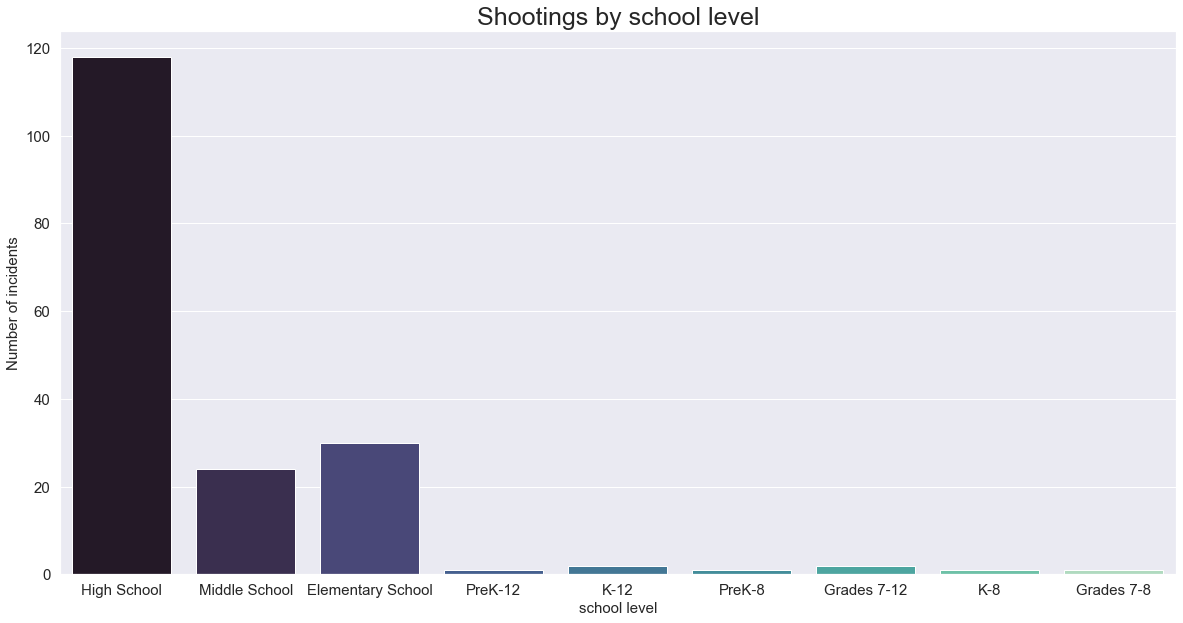

In [479]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x=df['type'],palette="mako")
plt.title("Shootings by school level", size=25)
plt.xlabel("school level",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of incidents",size=15)
plt.show()

#### Shootings by shooter's race

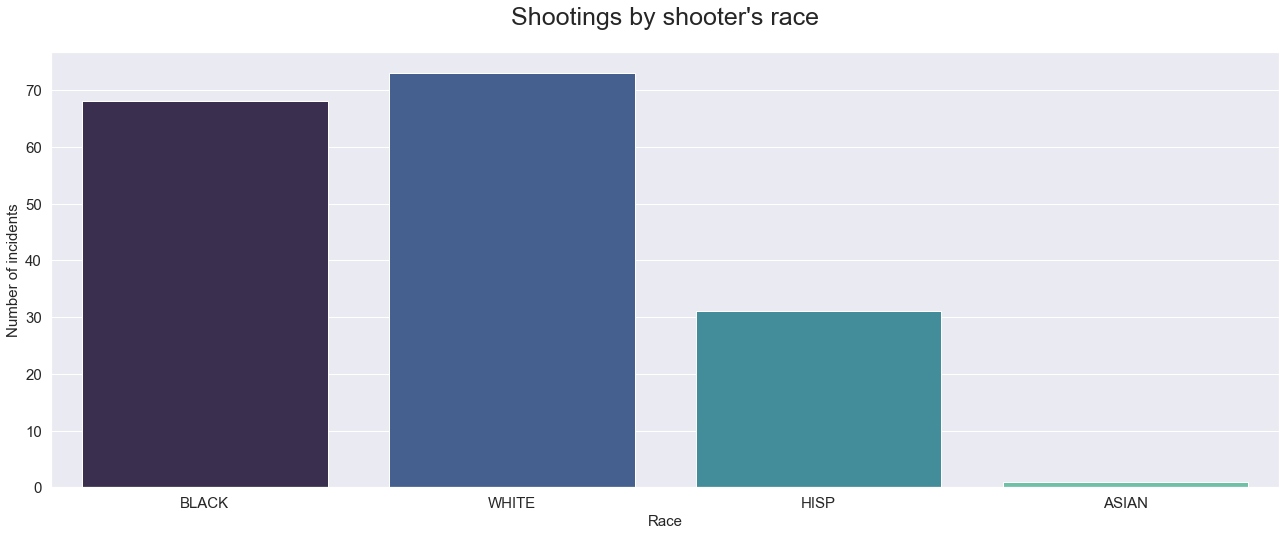

In [453]:
plt.figure(figsize=(22,8))
sns.countplot(data=df,x=df['race'],palette="mako")
plt.title("Shootings by shooter's race", size=25, y=1.05)
plt.xlabel("Race",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of incidents",size=15)
plt.show()

### What is the percentage of shootings by race? 

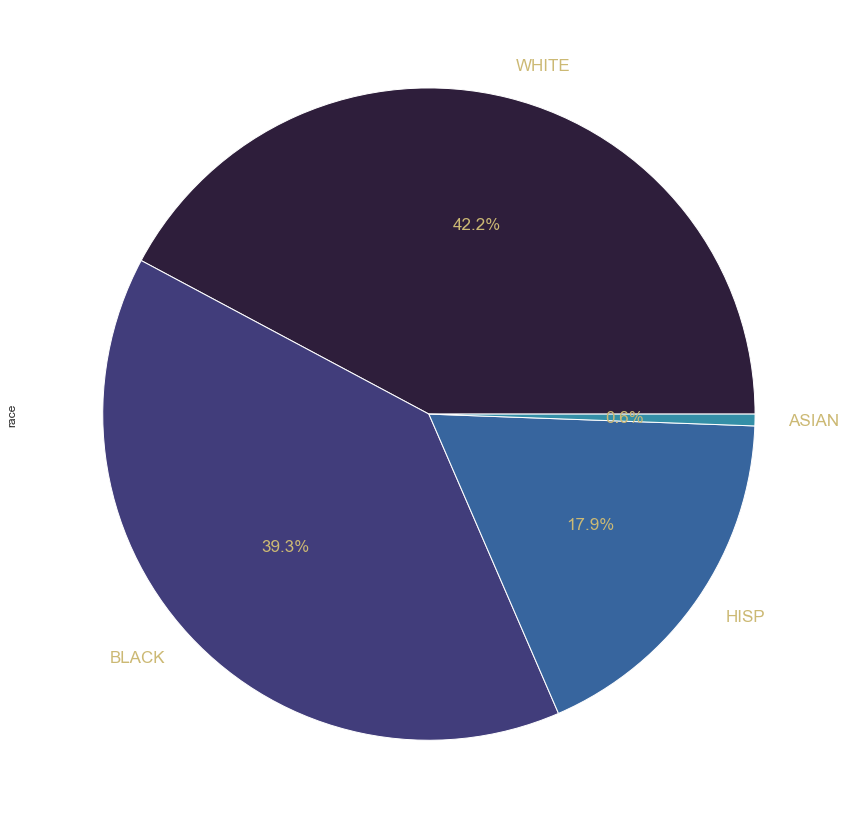

In [468]:
pie=df['race'].value_counts()
palette_color = sns.color_palette("mako")
pie.plot(kind='pie',y='date',figsize=(30,15),autopct='%1.1f%%',colors=palette_color,textprops={'color':"y",'fontsize':'17'})
plt.show()

#### Which state has had more fatalities?

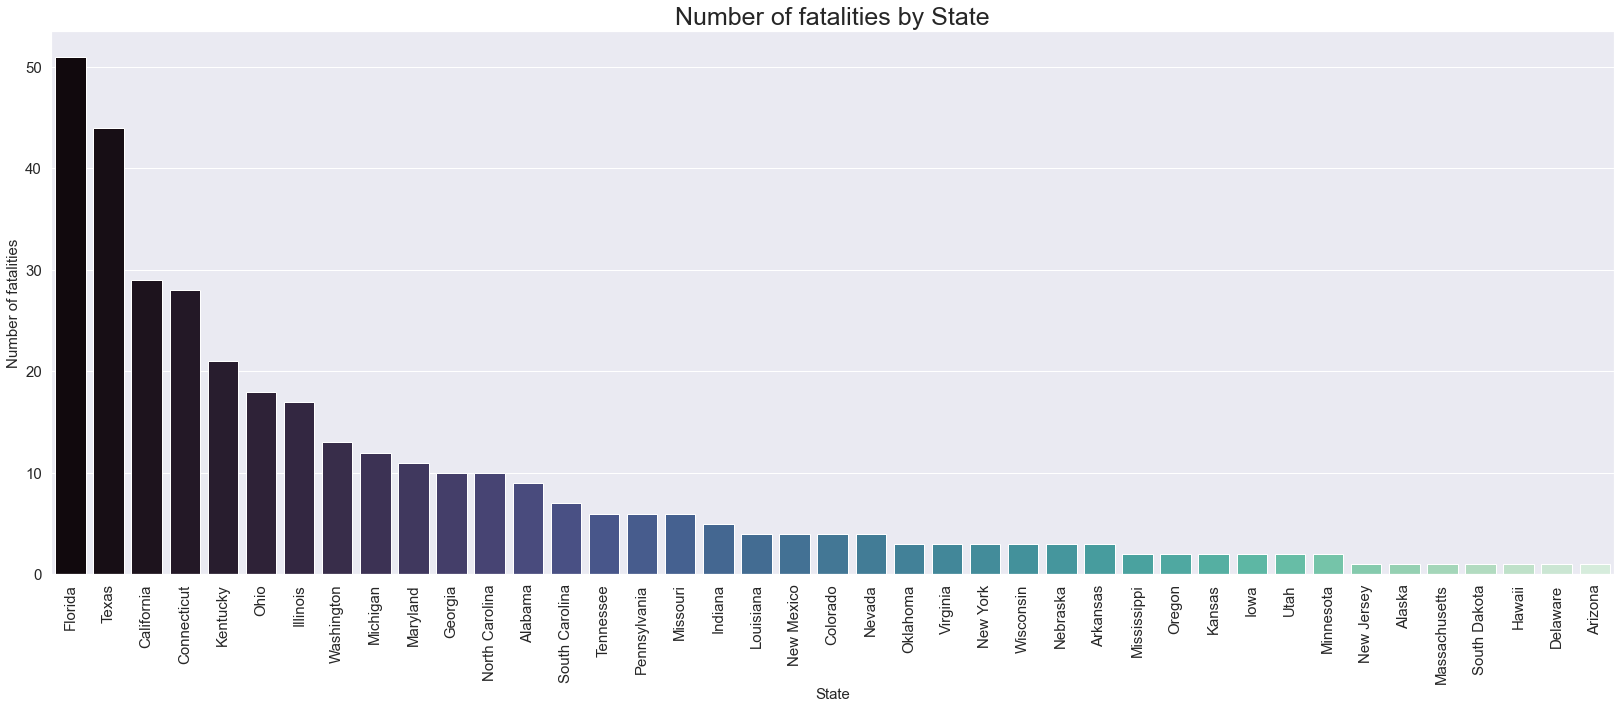

In [477]:
data=df.pivot_table('victims',index=['state'],aggfunc='sum').reset_index().sort_values(by=['victims'],ascending=False)
plt.figure(figsize=(28,10))
ax=sns.barplot(data=data,x=data['state'],y=data['victims'],palette="mako")
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 90)
plt.title("Number of fatalities by State", size=25)
plt.xlabel("State",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Number of fatalities",size=15)
plt.show()